In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
import matplotlib.pyplot as plt

In [5]:
food_consumption = pd.read_csv('dataset/food_consumption.csv', index_col=False)

In [6]:
food_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


In [7]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']


# Calculate mean and median consumption in Belgium
print('Mean consumption in Belgium:', np.mean(be_consumption['consumption']))
print('Median consumption in Belgium:',np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print('Mean consumption in USA:',np.mean(usa_consumption['consumption']))
print('Median consumption in USA:',np.median(usa_consumption['consumption']))

Mean consumption in Belgium: 42.13272727272727
Median consumption in Belgium: 12.59
Mean consumption in USA: 44.650000000000006
Median consumption in USA: 14.58


### Mean vs. median

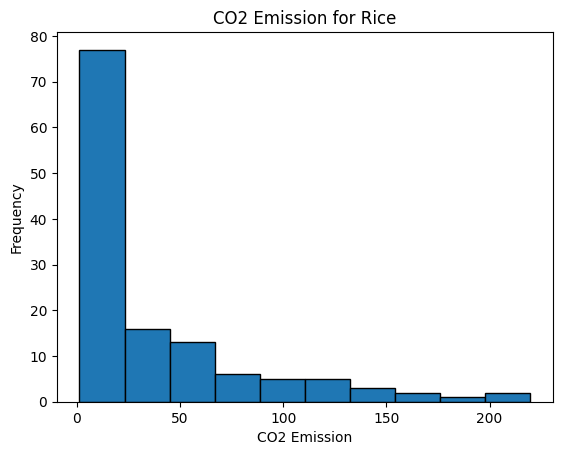

In [8]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice plot
plt.hist(rice_consumption['co2_emission'],  edgecolor='black')

# Add title and labels
plt.title('CO2 Emission for Rice')
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The histogram is right-skewed

In [9]:
# Use .agg() to calculate the mean and median of co2_emission for rice.

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print('Mean and median of co2 emissions for rice:\n',rice_consumption['co2_emission'].agg([np.mean,np.median]))

Mean and median of co2 emissions for rice:
 mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_72215/3772184344.py:7: FutureWarning: The provided callable <function mean at 0x106e271a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print('Mean and median of co2 emissions for rice:\n',rice_consumption['co2_emission'].agg([np.mean,np.median]))
/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_72215/3772184344.py:7: FutureWarning: The provided callable <function median at 0x1073fb4c0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print('Mean and median of co2 emissions for rice:\n',rice_consumption['co2_emission'].agg([np.mean,np.median]))


### Quantiles

Quartiles of the co2_emission of food_consumption

In [10]:
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.50, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


6 quantiles that split up the data into 5 pieces (quintiles) of the co2_emission

In [11]:
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


11 quantiles of co2_emission that split up the data into ten pieces (deciles).

In [12]:
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Variance & Standard Deviation

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


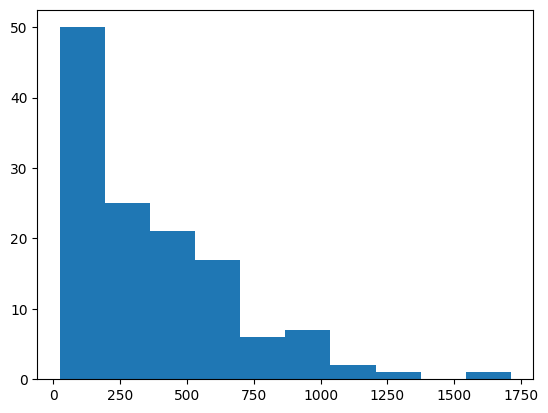

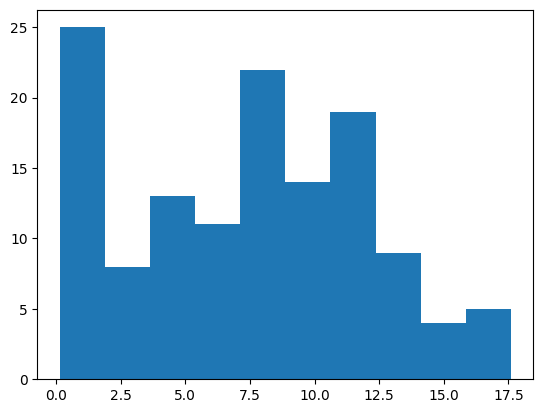

In [13]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'
].agg([np.var, np.std], ddof = 1))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.show()

Finding outliers using IQR

In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [15]:
# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [16]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [17]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
